In [1]:
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
import os
import shutil
import numpy as np
from sklearn.model_selection import train_test_split


dataset_dir = r"C:\Users\rakes\OneDrive\Desktop\Fruit_Guard_AI\fruit_vegetable_dataset"


classes = [d for d in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, d))]


output_dir = r"C:\Users\rakes\OneDrive\Desktop\Fruit_Guard_AI"
os.makedirs(output_dir, exist_ok=True)
os.makedirs(os.path.join(output_dir, 'train'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'val'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'test'), exist_ok=True)


for cls in classes:
    os.makedirs(os.path.join(output_dir, 'train', cls), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'val', cls), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'test', cls), exist_ok=True)

    class_dir = os.path.join(dataset_dir, cls)
    images = os.listdir(class_dir)

    print(f"Class: {cls}, Total Images: {len(images)}")

    
    train_and_val_images, test_images = train_test_split(images, test_size=0.2, random_state=42)
    train_images, val_images = train_test_split(train_and_val_images, test_size=0.25, random_state=42)

  
    for img in train_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(output_dir, 'train', cls, img))
    for img in val_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(output_dir, 'val', cls, img))
    for img in test_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(output_dir, 'test', cls, img))

print("✅ Dataset split into training, validation, and test sets successfully.")


Class: Apple__Healthy, Total Images: 2438
Class: Apple__Rotten, Total Images: 2930
Class: Banana__Healthy, Total Images: 2000
Class: Banana__Rotten, Total Images: 2800
Class: Bellpepper__Healthy, Total Images: 611
Class: Bellpepper__Rotten, Total Images: 591
Class: Carrot__Healthy, Total Images: 620
Class: Carrot__Rotten, Total Images: 580
Class: Cucumber__Healthy, Total Images: 608
Class: Cucumber__Rotten, Total Images: 593
Class: Grape__Healthy, Total Images: 200
Class: Grape__Rotten, Total Images: 200
Class: Guava__Healthy, Total Images: 200
Class: Guava__Rotten, Total Images: 200
Class: Jujube__Healthy, Total Images: 200
Class: Jujube__Rotten, Total Images: 200
Class: Mango__Healthy, Total Images: 1813
Class: Mango__Rotten, Total Images: 2247
Class: Orange__Healthy, Total Images: 2075
Class: Orange__Rotten, Total Images: 2186
Class: Pomegranate__Healthy, Total Images: 200
Class: Pomegranate__Rotten, Total Images: 200
Class: Potato__Healthy, Total Images: 615
Class: Potato__Rotten, 

In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator


base_dir = r"C:\Users\rakes\OneDrive\Desktop\Fruit_Guard_AI"
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Image size
IMG_SIZE = (224, 224)


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

print("Train Classes:", train_generator.class_indices)
print("Val Classes:", val_generator.class_indices)
print("Test Classes:", test_generator.class_indices)


Found 17560 images belonging to 28 classes.
Found 5856 images belonging to 28 classes.
Found 5861 images belonging to 28 classes.
Train Classes: {'Apple__Healthy': 0, 'Apple__Rotten': 1, 'Banana__Healthy': 2, 'Banana__Rotten': 3, 'Bellpepper__Healthy': 4, 'Bellpepper__Rotten': 5, 'Carrot__Healthy': 6, 'Carrot__Rotten': 7, 'Cucumber__Healthy': 8, 'Cucumber__Rotten': 9, 'Grape__Healthy': 10, 'Grape__Rotten': 11, 'Guava__Healthy': 12, 'Guava__Rotten': 13, 'Jujube__Healthy': 14, 'Jujube__Rotten': 15, 'Mango__Healthy': 16, 'Mango__Rotten': 17, 'Orange__Healthy': 18, 'Orange__Rotten': 19, 'Pomegranate__Healthy': 20, 'Pomegranate__Rotten': 21, 'Potato__Healthy': 22, 'Potato__Rotten': 23, 'Strawberry__Healthy': 24, 'Strawberry__Rotten': 25, 'Tomato__Healthy': 26, 'Tomato__Rotten': 27}
Val Classes: {'Apple__Healthy': 0, 'Apple__Rotten': 1, 'Banana__Healthy': 2, 'Banana__Rotten': 3, 'Bellpepper__Healthy': 4, 'Bellpepper__Rotten': 5, 'Carrot__Healthy': 6, 'Carrot__Rotten': 7, 'Cucumber__Healthy':

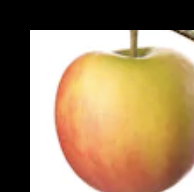

In [ ]:
import os
import random
from PIL import Image  
from IPython.display import display  


folder_path = r"C:\Users\rakes\OneDrive\Desktop\Fruit_Guard_AI\train\Apple__Healthy" 


image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]


selected_image = random.choice(image_files)


image_path = os.path.join(folder_path, selected_image)
display(Image.open(image_path))

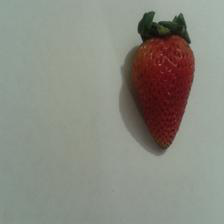

In [ ]:
import os
import random
from PIL import Image
from IPython.display import display


folder_path = r"C:\Users\rakes\OneDrive\Desktop\Fruit_Guard_AI\test\Strawberry__Healthy"


image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]


selected_image = random.choice(image_files)


image_path = os.path.join(folder_path, selected_image)


display(Image.open(image_path))


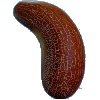

In [ ]:
import os
import random
from PIL import Image
from IPython.display import display


folder_path = r"C:\Users\rakes\OneDrive\Desktop\Fruit_Guard_AI\test\Cucumber__Rotten"


image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]


selected_image = random.choice(image_files)


image_path = os.path.join(folder_path, selected_image)


display(Image.open(image_path))


In [ ]:
trainpath = r"C:\Users\rakes\OneDrive\Desktop\Fruit_Guard_AI\train"
testpath = r"C:\Users\rakes\OneDrive\Desktop\Fruit_Guard_AI\test"

train_datagen = ImageDataGenerator(rescale = 1./255,zoom_range = 0.2,shear_range= 0.2)
test_datagen = ImageDataGenerator(rescale = 1./255)

train = train_datagen.flow_from_directory(trainpath,target_size =(224,224),batch_size = 20)
test = test_datagen.flow_from_directory(testpath,target_size =(224,224),batch_size = 20) ,



Found 17560 images belonging to 28 classes.
Found 5861 images belonging to 28 classes.


In [23]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

In [24]:
vgg = VGG16(include_top = False,input_shape = (224,224,3))

In [25]:
for layer in vgg.layers:
    print(layer)

<InputLayer name=input_layer, built=True>
<Conv2D name=block1_conv1, built=True>
<Conv2D name=block1_conv2, built=True>
<MaxPooling2D name=block1_pool, built=True>
<Conv2D name=block2_conv1, built=True>
<Conv2D name=block2_conv2, built=True>
<MaxPooling2D name=block2_pool, built=True>
<Conv2D name=block3_conv1, built=True>
<Conv2D name=block3_conv2, built=True>
<Conv2D name=block3_conv3, built=True>
<MaxPooling2D name=block3_pool, built=True>
<Conv2D name=block4_conv1, built=True>
<Conv2D name=block4_conv2, built=True>
<Conv2D name=block4_conv3, built=True>
<MaxPooling2D name=block4_pool, built=True>
<Conv2D name=block5_conv1, built=True>
<Conv2D name=block5_conv2, built=True>
<Conv2D name=block5_conv3, built=True>
<MaxPooling2D name=block5_pool, built=True>


In [ ]:

import os
from keras.applications import VGG16
from keras.models import Model
from keras.layers import Flatten, Dense, Dropout
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)
BATCH_SIZE = 4
EPOCHS = 1
base_dir = r"C:\Users\rakes\OneDrive\Desktop\Fruit_Guard_AI"
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')


train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_gen = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_gen.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)


model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS,
    steps_per_epoch=1,
    validation_steps=1,
    verbose=2
)


model.save("healthy_vs_rotten.h5")



Found 17560 images belonging to 28 classes.
Found 5856 images belonging to 28 classes.


c:\Users\rakes\anaconda3\envs\pyenv310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 - 2s - 2s/step - accuracy: 0.0000e+00 - loss: 3.4658 - val_accuracy: 0.0000e+00 - val_loss: 3.8052


In [ ]:
import os
print(os.path.exists(train_dir))  
print(os.listdir(base_dir))      


True
['app.py', 'checkpoint.ipynb', 'dataset', 'fruit_vegetable_dataset', 'healthy_vs_rotten.h5', 'static', 'templates', 'test', 'train', 'val', 'vgg16_fruit_classifier.h5']


In [4]:
labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]

In [5]:
img_path = r"C:\Users\rakes\OneDrive\Desktop\Fruit_Guard_AI\train\Bellpepper__Healthy\freshPepper (104).jpg"

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import load_model


labels = [
    'Apple___Fresh', 'Apple___Rotten',
    'Banana___Fresh', 'Banana___Rotten',
    'Bellpepper__Healthy', 'Bellpepper__Unhealthy',
    'Guava___Fresh', 'Guava___Rotten',
    'Mango___Fresh', 'Mango___Rotten',
    'Orange___Fresh', 'Orange___Rotten',
    'Pomegranate___Fresh', 'Pomegranate___Rotten',
    'Tomato___Fresh', 'Tomato___Rotten'
]


model = load_model("healthy_vs_rotten.h5") 


img_path = r"C:\Users\rakes\OneDrive\Desktop\Fruit_Guard_AI\train\Bellpepper__Healthy\freshPepper (11).jpg"
img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = preprocess_input(x)
x = np.expand_dims(x, axis=0)


preds = model.predict(x)
predicted_label = labels[np.argmax(preds)]

print("Predicted Class:", predicted_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step
Predicted Class: Apple___Fresh


In [17]:
labels[np.argmax(preds)]


'Apple___Fresh'

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import load_model


labels = [
    'Apple___Fresh', 'Apple___Rotten',
    'Banana___Fresh', 'Banana___Rotten',
    'Bellpepper__Healthy', 'Bellpepper__Unhealthy',
    'Guava___Fresh', 'Guava___Rotten',
    'Mango___Fresh', 'Mango___Rotten',
    'Orange___Fresh', 'Orange___Rotten',
    'Pomegranate___Fresh', 'Pomegranate___Rotten',
    'Tomato___Fresh', 'Tomato___Rotten'
]


model = load_model("healthy_vs_rotten.h5") 


img_path = r"C:\Users\rakes\OneDrive\Desktop\Fruit_Guard_AI\train\Apple__Healthy\FreshApple (18).jpg"
img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = preprocess_input(x)
x = np.expand_dims(x, axis=0)


preds = model.predict(x)
predicted_label = labels[np.argmax(preds)]

print("Predicted Class:", predicted_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step
Predicted Class: Apple___Rotten


In [20]:

labels[np.argmax(preds)]

'Apple___Rotten'

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import load_model


labels = [
    'Apple___Fresh', 'Apple___Rotten',
    'Banana___Fresh', 'Banana___Rotten',
    'Bellpepper__Healthy', 'Bellpepper__Unhealthy',
    'Guava___Fresh', 'Guava___Rotten',
    'Mango___Fresh', 'Mango___Rotten',
    'Orange___Fresh', 'Orange___Rotten',
    'Pomegranate___Fresh', 'Pomegranate___Rotten',
    'Tomato___Fresh', 'Tomato___Rotten'
]


model = load_model("healthy_vs_rotten.h5")  


img_path = r"C:\Users\rakes\OneDrive\Desktop\Fruit_Guard_AI\train\Apple__Rotten\rotated_by_15_Screen Shot 2018-06-07 at 2.23.24 PM.png"
img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = preprocess_input(x)
x = np.expand_dims(x, axis=0)


preds = model.predict(x)
predicted_label = labels[np.argmax(preds)]

print("Predicted Class:", predicted_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step
Predicted Class: Apple___Rotten


In [22]:

labels[np.argmax(preds)]

'Apple___Rotten'

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import load_model

labels = [
    'Apple___Fresh', 'Apple___Rotten',
    'Banana___Fresh', 'Banana___Rotten',
    'Bellpepper__Healthy', 'Bellpepper__Unhealthy',
    'Guava___Fresh', 'Guava___Rotten',
    'Mango___Fresh', 'Mango___Rotten',
    'Orange___Fresh', 'Orange___Rotten',
    'Pomegranate___Fresh', 'Pomegranate___Rotten',
    'Tomato___Fresh', 'Tomato___Rotten'
]


model = load_model("healthy_vs_rotten.h5") 


img_path = r"C:\Users\rakes\OneDrive\Desktop\Fruit_Guard_AI\train\Carrot__Healthy\freshCarrot (7).jpg"
img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = preprocess_input(x)
x = np.expand_dims(x, axis=0)

preds = model.predict(x)
predicted_label = labels[np.argmax(preds)]

print("Predicted Class:", predicted_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step
Predicted Class: Banana___Rotten


In [24]:

labels[np.argmax(preds)]

'Banana___Rotten'

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import load_model

labels = [
    'Apple___Fresh', 'Apple___Rotten',
    'Banana___Fresh', 'Banana___Rotten',
    'Bellpepper__Healthy', 'Bellpepper__Unhealthy',
    'Guava___Fresh', 'Guava___Rotten',
    'Mango___Fresh', 'Mango___Rotten',
    'Orange___Fresh', 'Orange___Rotten',
    'Pomegranate___Fresh', 'Pomegranate___Rotten',
    'Tomato___Fresh', 'Tomato___Rotten'
]


model = load_model("healthy_vs_rotten.h5") 


img_path = r"C:\Users\rakes\OneDrive\Desktop\Fruit_Guard_AI\train\Cucumber__Rotten\rottenCucumber (15).jpg"
img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = preprocess_input(x)
x = np.expand_dims(x, axis=0)


preds = model.predict(x)
predicted_label = labels[np.argmax(preds)]

print("Predicted Class:", predicted_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step
Predicted Class: Bellpepper__Unhealthy


In [27]:

labels[np.argmax(preds)]

'Bellpepper__Unhealthy'

In [28]:
vgg16.save('healthy_vs_rotten.h5')